https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras import layers
import pydot 
import graphviz
# tf.compat.v1.enable_eager_execution(
#     config=None, device_policy=None, execution_mode=None
# )
print(tf.__version__)

2.8.0


In [3]:
df = pd.read_csv("/content/drive/MyDrive/data/passenger_satisfaction.csv")
df = df.dropna()

In [4]:
df["target"] = np.where(df["satisfaction"]=="satisfied",1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.drop(columns=['satisfaction','id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df.describe()

,age,flight_distance,wifi_service,departure_arrival_time_convenient,online_booking_ease,gate_location,food_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,target
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   travel_type                        129487 non-null  object 
 4   class                              129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   wifi_service                       129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   online_booking_ease                129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_drink                         129487 non-null  int64  
 11  online_boarding                    1294

In [8]:
x = np.where(df.arrival_delay == 0)
len(x[0])

72753

In [9]:
df.tail(5)

,gender,customer_type,age,travel_type,class,flight_distance,wifi_service,departure_arrival_time_convenient,online_booking_ease,gate_location,...,inflight_entertainment,onboard_service,legroom_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,target
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,2,1,1,1,1,0,0.0,0


In [10]:
unique_genders = pd.unique(df.gender)
unique_ctype = pd.unique(df.customer_type)
unique_ttype = pd.unique(df.travel_type)
unique_class = pd.unique(df['class'])


In [11]:
unique_genders

array(['Male', 'Female'], dtype=object)

In [12]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

82871 train examples
20718 validation examples
25898 test examples


In [13]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [14]:
batch_size = 32 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [15]:
[(train_features,lable_batch)]=train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['age'])
print('A batch of targets:', lable_batch )

Every feature: ['gender', 'customer_type', 'age', 'travel_type', 'class', 'flight_distance', 'wifi_service', 'departure_arrival_time_convenient', 'online_booking_ease', 'gate_location', 'food_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'legroom_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay', 'arrival_delay']
A batch of ages: tf.Tensor(
[34 50 78 31 41 33 35 13 11 20 40 11 52 44 23 25 21 38 55 24 50 31 43 28
 33 53 35 70 27 13 42 38], shape=(32,), dtype=int64)
A batch of targets: tf.Tensor([0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0], shape=(32,), dtype=int64)


In [16]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['arrival_delay'])
  print('A batch of targets:', label_batch )

Every feature: ['gender', 'customer_type', 'age', 'travel_type', 'class', 'flight_distance', 'wifi_service', 'departure_arrival_time_convenient', 'online_booking_ease', 'gate_location', 'food_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'legroom_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay', 'arrival_delay']
A batch of ages: tf.Tensor(
[  0.   3.   3.   0.  10.  22.   0.   1.  25.  15.  14.   5.   0.   0.
   0.  10.   0.  94.   0. 111.   0.   0. 243.   2.   0.   0. 172.  14.
   0.   0.   0.   9.], shape=(32,), dtype=float64)
A batch of targets: tf.Tensor([1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0], shape=(32,), dtype=int64)


In [17]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [18]:
flight_distance_col = train_features["flight_distance"]
flight_distance_layer = get_normalization_layer("flight_distance",train_ds)
# flight_distance_layer.adapt(flight_distance_col)
flight_distance_layer(flight_distance_col)

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([-0.37050045, -0.6107434 ,  1.1930809 , -0.32445386,  1.1770647 ,
        0.95283794, -0.59272516, -0.34747717,  1.285174  , -0.573706  ,
       -1.0852233 , -0.76189625, -1.0001372 , -0.94408053,  2.423325  ,
       -0.87501067, -0.5476796 , -0.91204816,  2.5985022 ,  1.1049918 ,
       -0.738873  ,  2.5274303 , -0.8599955 ,  0.39627504, -0.93006635,
       -0.56769985, -0.26639515, -0.95308965, -1.0912293 , -0.6227556 ,
        1.852748  , -0.5576897 ], dtype=float32)>

In [19]:
departure_delay_col = train_features["departure_delay"]
departure_delay_layer = get_normalization_layer("departure_delay",train_ds)
# departure_delay_layer.adapt(departure_delay_col)
departure_delay_layer(departure_delay_col)

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([-0.38991997, -0.38991997, -0.38991997, -0.38991997, -0.3364276 ,
        3.3010514 , -0.36317378, -0.38991997, -0.38991997, -0.38991997,
        1.1613579 , -0.38991997, -0.36317378, -0.38991997, -0.38991997,
        2.8463666 , -0.38991997,  0.03801877,  2.8463666 , -0.38991997,
       -0.20269676, -0.04221974,  0.41246516, -0.38991997, -0.38991997,
        0.78691155, -0.38991997,  0.8404039 , -0.38991997, -0.38991997,
       -0.38991997, -0.38991997], dtype=float32)>

In [20]:
arrival_delay_col = train_features["arrival_delay"]
arrival_delay_layer = get_normalization_layer("arrival_delay",train_ds)
# arrival_delay_layer.adapt(arrival_delay_col)
arrival_delay_layer(arrival_delay_col)

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([-0.2905915 , -0.26421583, -0.3960942 , -0.23784015, -0.2905915 ,
        3.0063682 , -0.3960942 , -0.3960942 , -0.3960942 , -0.3960942 ,
        0.7380599 , -0.3960942 , -0.3960942 ,  0.05229229, -0.3960942 ,
        2.5052302 , -0.3960942 ,  0.5270545 ,  2.7953627 , -0.3960942 ,
        0.05229229, -0.2905915 ,  0.7116842 , -0.3960942 , -0.3960942 ,
        3.349252  , -0.3960942 ,  0.8699383 , -0.3960942 , -0.36971852,
       -0.3960942 , -0.3960942 ], dtype=float32)>

In [21]:
index = layers.StringLookup(max_tokens=None)
index.get_vocabulary()

['[UNK]']

In [22]:
train_ds

<BatchDataset element_spec=({'gender': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'customer_type': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'travel_type': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'flight_distance': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'wifi_service': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'departure_arrival_time_convenient': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'online_booking_ease': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'gate_location': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'food_drink': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'online_boarding': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'seat_comfort': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'inflight_entertainment': TensorSpec(shape=(No

In [23]:
feature_ds = train_ds.map(lambda x, y: x['gender'])
feature_ds.take(1)

<TakeDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

In [24]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])
  
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size(),output_mode="one_hot")

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [25]:
feature_ds = train_ds.map(lambda x, y: x["gender"])
index = layers.StringLookup(max_tokens=None)
index.adapt(feature_ds)
encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size(),output_mode="one_hot")
encoder

In [26]:
index.vocabulary_size()

3

In [27]:
encoder(index(train_features["gender"]))

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [28]:
gender_type_col = train_features["gender"]
gender_type_layer = get_category_encoding_layer("gender",train_ds,"string")
gender_type_layer(gender_type_col)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [29]:
customer_type_col = train_features["customer_type"]
customer_type_layer = get_category_encoding_layer("customer_type",train_ds,"string")
customer_type_layer(customer_type_col)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)>

In [30]:
travel_type_col = train_features["travel_type"]
travel_type_layer = get_category_encoding_layer("travel_type",train_ds,"string")
travel_type_layer(travel_type_col)

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [31]:
class_type_col = train_features["class"]
class_type_layer = get_category_encoding_layer("class",train_ds,"string")
class_type_layer(class_type_col)

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

In [32]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [33]:
# Get DataFrame Column Names of a Multiple Data Types
numeric_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

In [34]:
object_cols = [c for c in df.columns if df[c].dtype in ['object']]


In [35]:
numeric_cols.remove('target')

In [36]:
numeric_cols

['age',
 'flight_distance',
 'wifi_service',
 'departure_arrival_time_convenient',
 'online_booking_ease',
 'gate_location',
 'food_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'legroom_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay',
 'arrival_delay']

In [37]:
object_cols

['gender', 'customer_type', 'travel_type', 'class']

In [38]:
all_inputs = []
encoded_features = []
# Numerical features.
for header in numeric_cols:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [39]:
for header in object_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=12)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [40]:
encoded_features 

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_3')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_4')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_8')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_9')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_10')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_11')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_12')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_13')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normaliz

In [41]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(all_features)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(all_inputs, output)

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

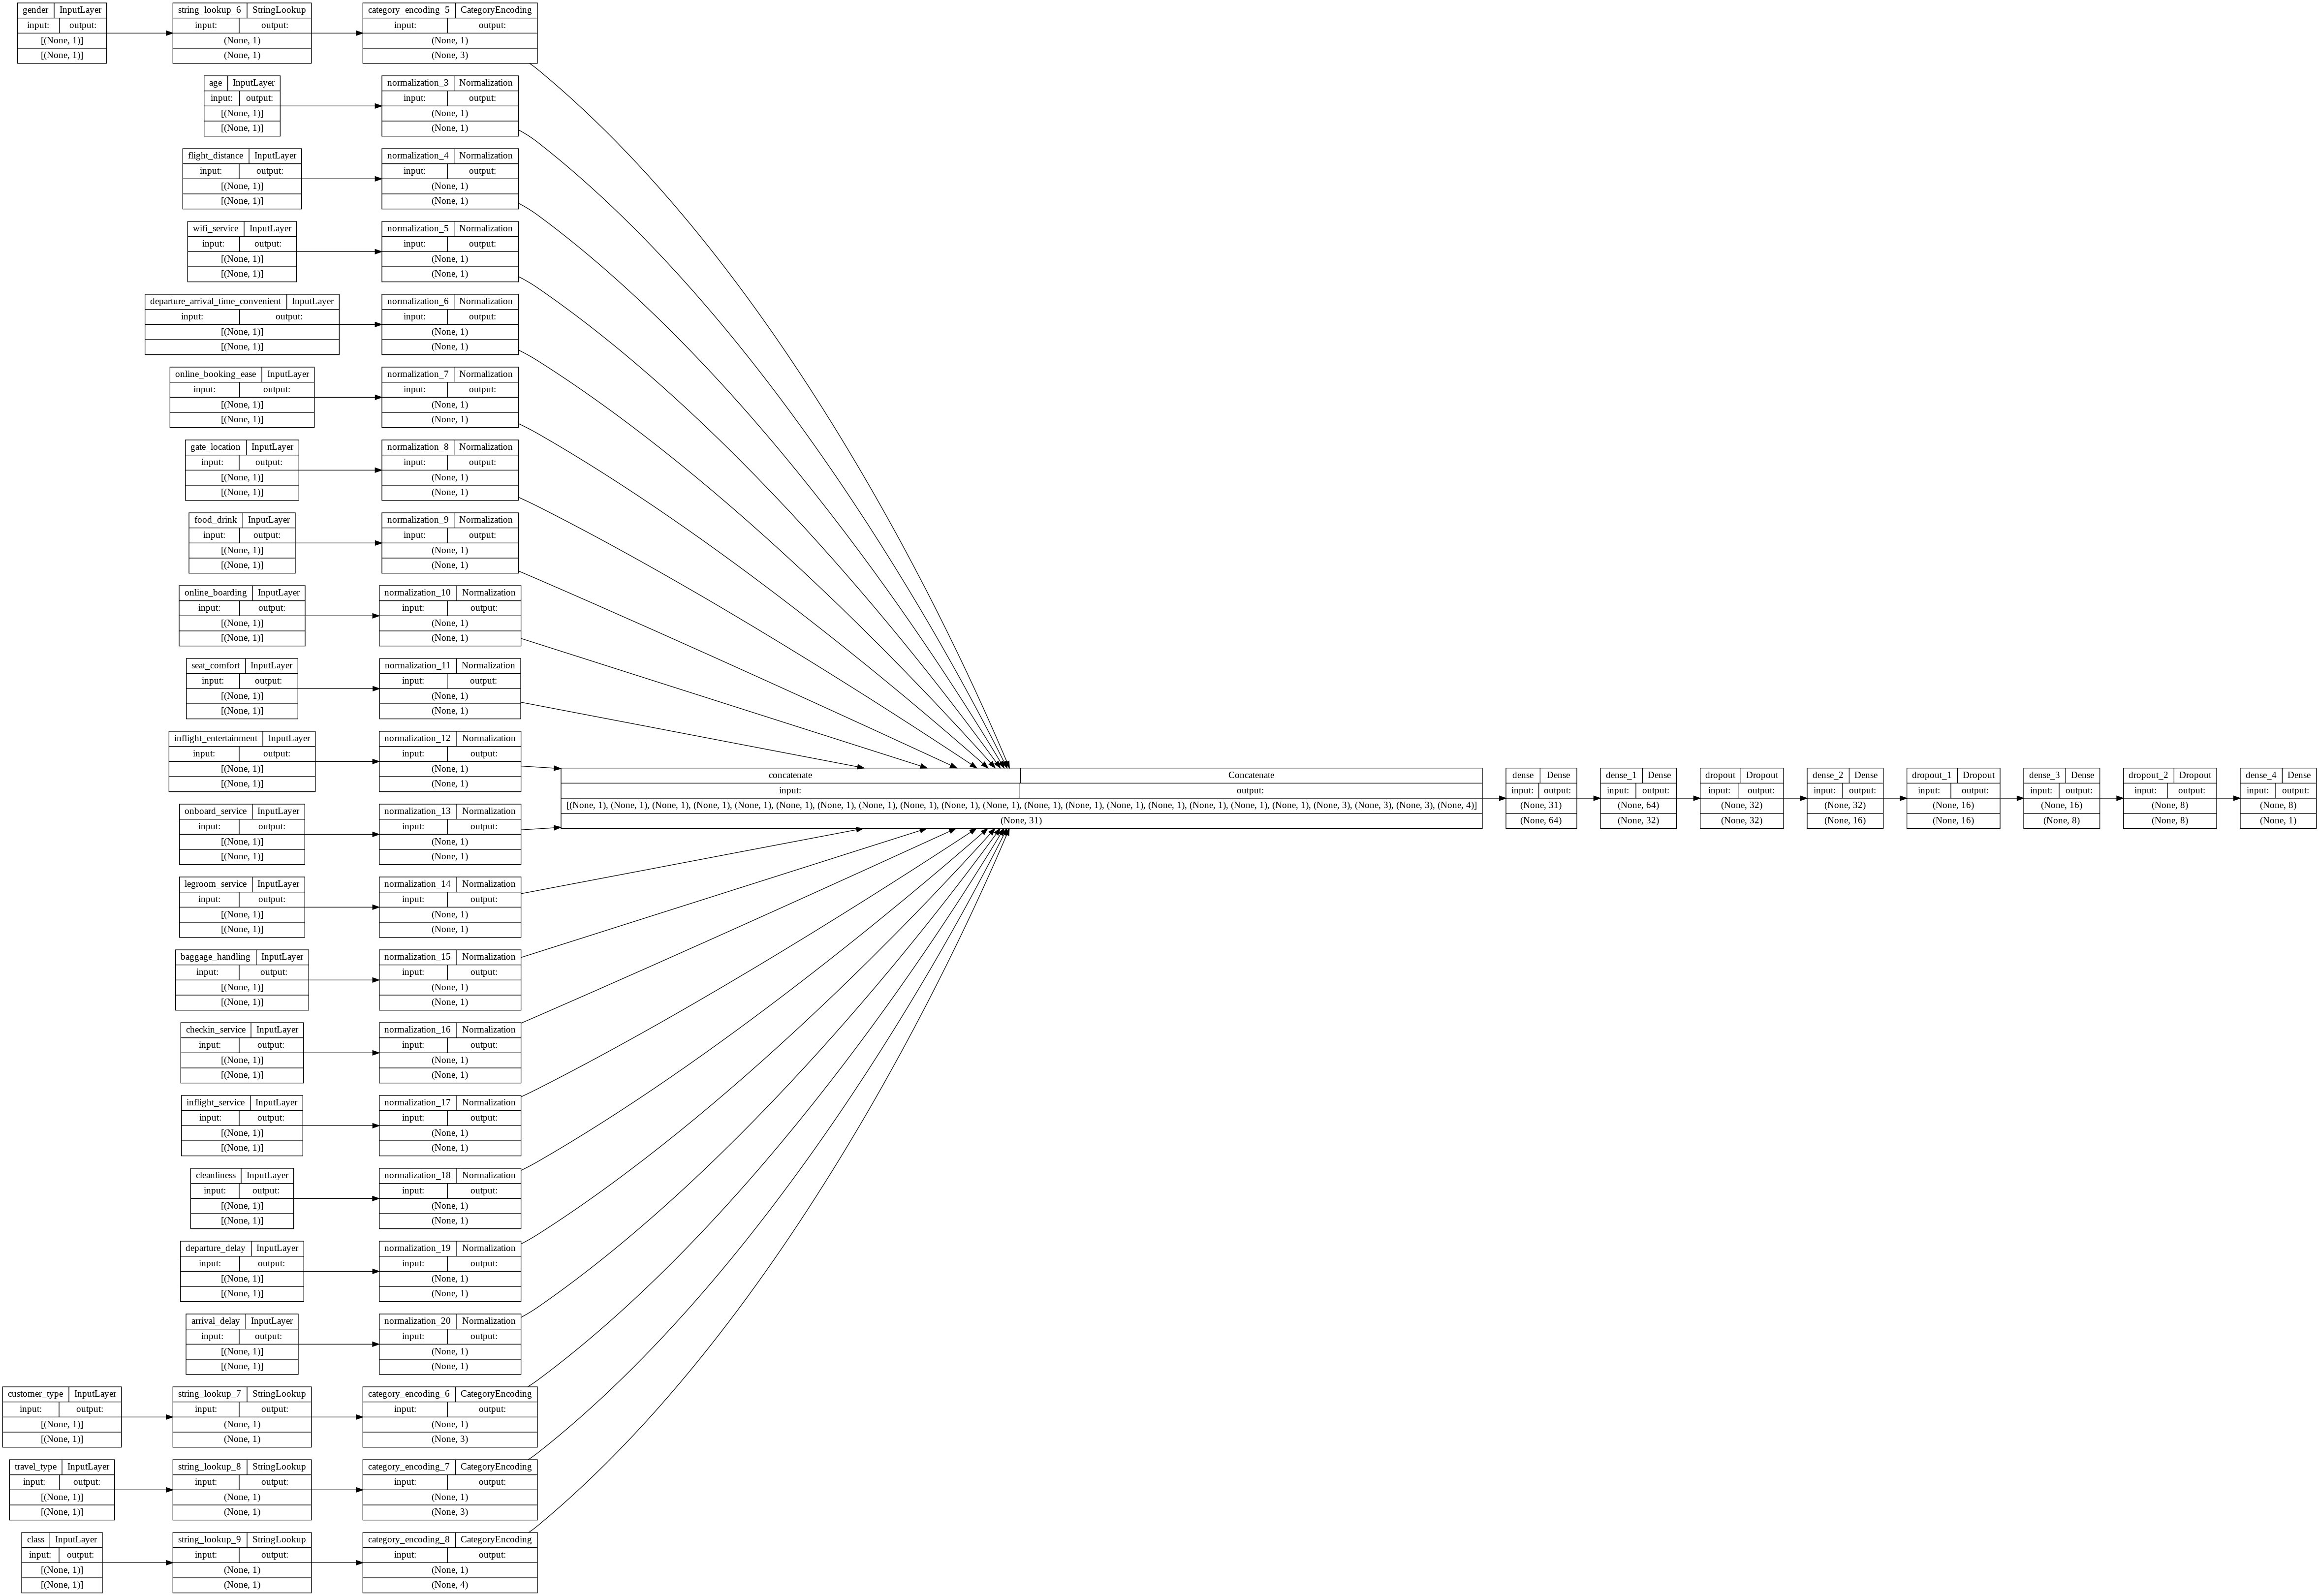

In [43]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [48]:
with tf.device('/device:GPU:0'):
  model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
324/324 [==============================] - 9s 23ms/step - loss: 0.1477 - accuracy: 0.9411 - val_loss: 0.1125 - val_accuracy: 0.9562
Epoch 2/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1457 - accuracy: 0.9421 - val_loss: 0.1134 - val_accuracy: 0.9556
Epoch 3/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1460 - accuracy: 0.9418 - val_loss: 0.1111 - val_accuracy: 0.9568
Epoch 4/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1437 - accuracy: 0.9426 - val_loss: 0.1123 - val_accuracy: 0.9559
Epoch 5/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1436 - accuracy: 0.9433 - val_loss: 0.1097 - val_accuracy: 0.9547
Epoch 6/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1417 - accuracy: 0.9437 - val_loss: 0.1050 - val_accuracy: 0.9570
Epoch 7/100
324/324 [==============================] - 6s 16ms/step - loss: 0.1414 - accuracy: 0.9439 - val_loss: 0.1080 - val_accuracy:

In [49]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

102/102 [==============================] - 1s 14ms/step - loss: 0.1157 - accuracy: 0.9592
Accuracy 0.9592246413230896


In [50]:
# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))


Evaluate
102/102 [==============================] - 1s 14ms/step - loss: 0.1157 - accuracy: 0.9592


{'accuracy': 0.9592246413230896, 'loss': 0.11571861058473587}